<a href="https://colab.research.google.com/github/dfukagaw28/ColabNotebooks/blob/main/mmdet%E3%82%92%E8%A9%A6%E3%81%99_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mmdet を試す (3)

*   PyTorch の再インストールを回避する

In [1]:
# このセルを実行後，再起動が必要
!pip install openmim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 449.6/449.6 kB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.5/311.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.5/506.5 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 6.5 MB/s eta 0:0

In [1]:
!pip install -U albumentations

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.0/224.0 kB 14.1 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [2]:
!mim install mmdet mmcv

Looking in links: https://download.openmmlab.com/mmcv/dist/cu121/torch2.4.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00
Ignoring mmcv: markers 'extra == "mim"' don't match your environment
Ignoring mmengine: markers 'extra == "mim"' don't match your environment
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.3/452.3 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 19.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 3.3.0 requires mmcv<2.2.0,>=2.0.0rc4; extra == "mim", but you have mmcv 2.2.0 which is incompatible.


## ソースコードを書き換える

In [7]:
%%writefile mmdet__init__.diff
--- a/__init__.py	2024-10-14 23:25:34.068213962 +0000
+++ b/__init__.py	2024-10-14 23:25:50.141760514 +0000
@@ -6,7 +6,7 @@ from mmengine.utils import digit_version
 from .version import __version__, version_info

 mmcv_minimum_version = '2.0.0rc4'
-mmcv_maximum_version = '2.2.0'
+mmcv_maximum_version = '2.3.0'
 mmcv_version = digit_version(mmcv.__version__)

 mmengine_minimum_version = '0.7.1'

Writing mmdet__init__.diff


In [8]:
!cd /usr/local/lib/python3.10/dist-packages/mmdet && patch -p1 < /content/mmdet__init__.diff

patching file __init__.py


## デモ用の画像をダウンロードする

In [3]:
!wget -P demo https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/demo/demo.jpg

--2024-10-15 20:16:55--  https://raw.githubusercontent.com/open-mmlab/mmdetection/refs/heads/main/demo/demo.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 259865 (254K) [image/jpeg]
Saving to: ‘demo/demo.jpg’

demo.jpg            100%[===================>] 253.77K  --.-KB/s    in 0.03s   

2024-10-15 20:16:55 (9.52 MB/s) - ‘demo/demo.jpg’ saved [259865/259865]



## RTMDet を試す

In [4]:
!mim download mmdet --config rtmdet_tiny_8xb32-300e_coco --dest .

processing rtmdet_tiny_8xb32-300e_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 MiB 7.6 MB/s eta 0:00:00
Successfully downloaded rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth to /content
Successfully dumped rtmdet_tiny_8xb32-300e_coco.py to /content


In [5]:
!ls -l rtmdet*

-rw-r--r-- 1 root root 57532893 Oct 15 20:17 rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth
-rw-r--r-- 1 root root    14363 Oct 15 20:17 rtmdet_tiny_8xb32-300e_coco.py


/usr/local/lib/python3.10/dist-packages/mmengine/optim/optimizer/zero_optimizer.py:11: DeprecationWarning: `TorchScript` support for functional optimizers is deprecated and will be removed in a future PyTorch release. Consider using the `torch.compile` optimizer instead.
  from torch.distributed.optim import \


Loads checkpoint by local backend from path: ./rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth


/usr/local/lib/python3.10/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_l

The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std

10/15 20:22:53 - mmengine - WARNING - Failed to search registry with scope "mmdet" in the "function" registry tree. As a workaround, the current "function" registry in "mmengine" is used to build instance. This may cause unexpected failure when running the built modules. Please check whether "mmdet" is a correct scope, or whether the registry is initialized.


Output()

/usr/local/lib/python3.10/dist-packages/mmengine/visualization/visualizer.py:196: UserWarning: Failed to add <class 'mmengine.visualization.vis_backend.LocalVisBackend'>, please provide the `save_dir` argument.
  warnings.warn(f'Failed to add {vis_backend.__class__}, '


/usr/local/lib/python3.10/dist-packages/mmdet/models/layers/se_layer.py:158: FutureWarning: 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):

/usr/local/lib/python3.10/dist-packages/mmdet/models/backbones/csp_darknet.py:118: FutureWarning: 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=False):

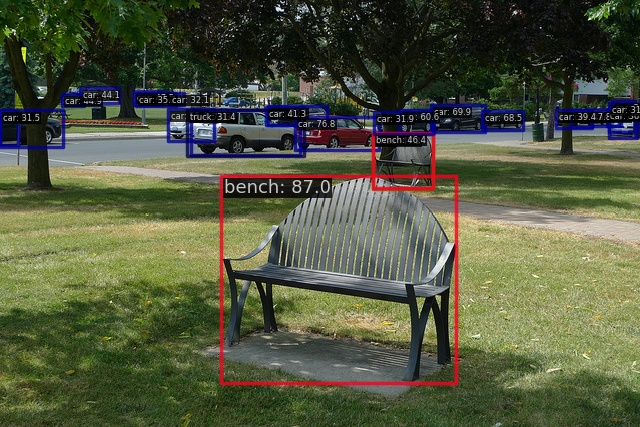

In [9]:
from PIL import Image
from mmdet.apis import DetInferencer

model_name = './rtmdet_tiny_8xb32-300e_coco.py'
checkpoint = './rtmdet_tiny_8xb32-300e_coco_20220902_112414-78e30dcc.pth'
inferencer = DetInferencer(model_name, checkpoint)

img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Image.open('./output/vis/demo.jpg')

## Mask R-CNN を試す

In [10]:
!mim download mmdet --config mask-rcnn_r50_fpn_1x_coco --dest .

processing mask-rcnn_r50_fpn_1x_coco...
downloading ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 MiB 8.7 MB/s eta 0:00:00
Successfully downloaded mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth to /content
Successfully dumped mask-rcnn_r50_fpn_1x_coco.py to /content


In [11]:
!ls -l mask*

-rw-r--r-- 1 root root 177862517 Oct 15 20:24 mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth
-rw-r--r-- 1 root root     10474 Oct 15 20:24 mask-rcnn_r50_fpn_1x_coco.py


Loads checkpoint by local backend from path: ./mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth


/usr/local/lib/python3.10/dist-packages/mmengine/runner/checkpoint.py:347: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(filename, map_location=map_l

Output()

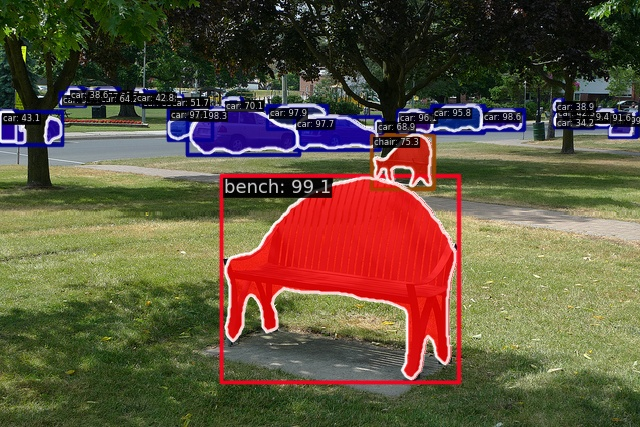

In [12]:
from PIL import Image
from mmdet.apis import DetInferencer

model_name = './mask-rcnn_r50_fpn_1x_coco.py'
checkpoint = './mask_rcnn_r50_fpn_1x_coco_20200205-d4b0c5d6.pth'
inferencer = DetInferencer(model_name, checkpoint)

img = './demo/demo.jpg'
result = inferencer(img, out_dir='./output')

Image.open('./output/vis/demo.jpg')